## Анализ эффективности студентов на Курсе Статистического практикума

### Введение в Методологию

Для **оценки учебной активности** студентов, были выбраны следующие **три ключевые метрики**:

1. **Вклад полностью выполненных домашних заданий** - процент выполненных заданий из пяти возможных.
2. **Вклад частично выполненных заданий**, где каждое такое задание вносит вклад, равный _половине_ полностью выполненного задания.
3. **Состояние проекта**, отражающее текущий уровень его завершённости.

### Процесс Кластеризации

Используя метод иерархической кластеризации, который стремится к **минимизации внутрикластерного расстояния**, было выявлено **четыре основных категории студентов**:

- **Фиолетовые (Зачёт)**: Студенты, полностью успевающие сдавать все задания курса.
- **Синие (Доработка проекта)**: Студенты, успешно выполняющие домашние задания, но не завершившие проект. Требуется специальный подход на зачёте, включая демонстрацию знаний методов регрессии и классификации.
- **Зелёные (Усиленные домашние задания)**: Студенты, сдавшие проект, но испытывающие трудности с домашними заданиями. На зачёте им потребуется демонстрация дополнительных теоретических знаний.
- **Красные (Пересдача)**: Студенты, не сдавшие проект и не выполнившие достаточное количество домашних заданий. Вероятно, будут направлены на пересдачу.



                             name  basic  numpy  random  pandas  knn  project
1         Агаева Эмилия Назимовна    5.0    2.0     7.0     1.0  0.0      0.0
2         Бауман Артём Георгиевич    2.5    2.0     3.0     1.0  1.0      1.0
3             Вехов Иван Олегович    6.0    2.0     7.0     1.0  1.0      1.0
4         Егоров Кирилл Сергеевич    0.0    0.0     0.0     0.0  0.0      1.0
5      Килимчук Иван Вячеславович    5.0    2.0     7.0     1.0  1.0      1.0
6         Кираев Булат Рустамович    6.0    2.0     7.0     1.0  1.0      1.0
7           Козлов Глеб Денисович    5.0    2.0     7.0     1.0  1.0      1.0
8        Корнийчук Павел Павлович    4.5    2.0     6.5     0.0  0.0      1.0
9    Мирошниченко Никита Игоревич    5.5    2.0     7.0     1.0  1.0      1.0
10      Родионова Мария Романовна    5.0    2.0     8.0     1.0  1.0      1.0
11        Садыков Артур Маратович    6.0    0.0     0.0     0.0  0.0      1.0
12        Сёмин Михаил Максимович    4.5    2.0     6.0     1.0 

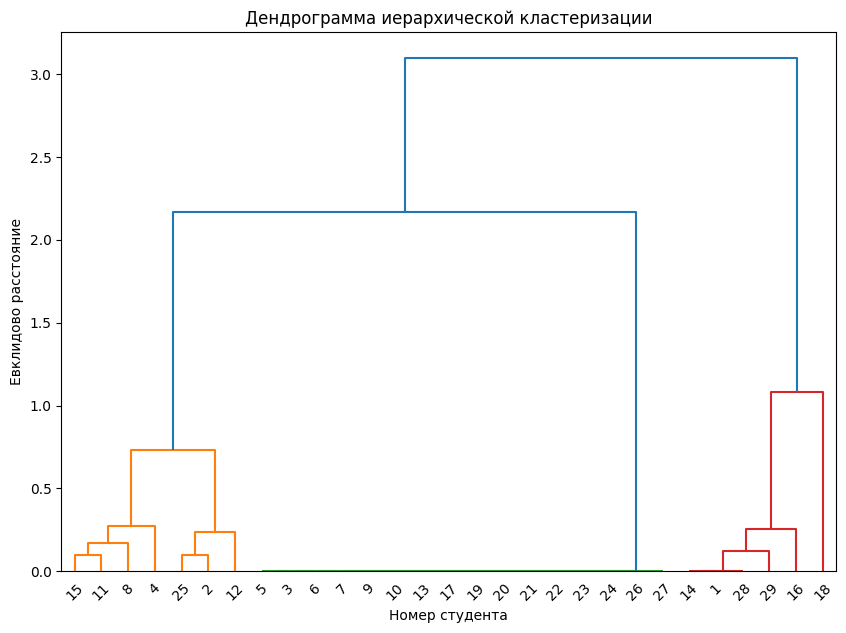

    вклад полных домашек  вклад частичных домашек  project  \
1                    0.8                      0.0      0.0   
2                    0.6                      0.2      1.0   
3                    1.0                      0.0      1.0   
4                    0.0                      0.0      1.0   
5                    1.0                      0.0      1.0   
6                    1.0                      0.0      1.0   
7                    1.0                      0.0      1.0   
8                    0.2                      0.2      1.0   
9                    1.0                      0.0      1.0   
10                   1.0                      0.0      1.0   
11                   0.2                      0.0      1.0   
12                   0.4                      0.2      1.0   
13                   1.0                      0.0      1.0   
14                   0.8                      0.0      0.0   
15                   0.2                      0.1      1.0   
16      

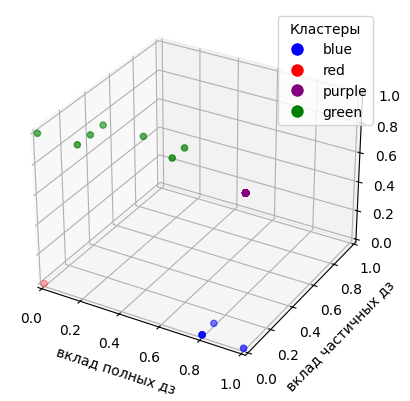


Зачет:
['Вехов Иван Олегович' 'Килимчук Иван Вячеславович'
 'Кираев Булат Рустамович' 'Козлов Глеб Денисович'
 'Мирошниченко Никита Игоревич' 'Родионова Мария Романовна'
 'Циберева Елизавета Кирилловна' 'Гладков Иван' 'Дручук Георгий'
 'Зайцев Даниил' 'Караваева Александра' 'Малышев Максим' 'Микляева Дарья'
 'Морозова Мария' 'Тарасюк Екатерина' 'Тылык Даниил']

Досдать дз:
['Бауман Артём Георгиевич' 'Егоров Кирилл Сергеевич'
 'Корнийчук Павел Павлович' 'Садыков Артур Маратович'
 'Сёмин Михаил Максимович' 'Бакланов Владимир' 'Русанов Эрик']

Сдать проект:
['Агаева Эмилия Назимовна' 'Яранцев Егор Евгеньевич' 'Виноградова Мария'
 'Шипицын Матвей' 'Уваров Андрей']

Пересдача:
['Горностаев Геннадий']


In [28]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

 
file_path = "table.csv"
df = pd.read_csv(file_path)


import pandas as pd


df = pd.read_csv('table.csv')

new_df = df.iloc[1:, [1, 10, 13, 24, 25, 26, 28]]
new_column_names = ['name','basic', 'numpy', 'random', 'pandas', 'knn', 'project']
new_df.columns = new_column_names

def replace_comma(x):
    if isinstance(x, str):
        return x.replace(',', '.')
    return x
new_df = new_df.map(replace_comma)

new_df.iloc[:, 1:] = new_df.iloc[:, 1:].astype(float)

new_df.fillna(0, inplace=True)


print(new_df)
thresholds = {'basic': 5, 'numpy': 1.5, 'random': 7, 'pandas': 1, 'knn': 1}


def threshold1(row, thresholds):
    count = 0
    for col, threshold in thresholds.items():
        if row[col] >= threshold:
            count += 1
    return count

new_df['вклад полных домашек'] = new_df.apply(threshold1, axis=1, thresholds=thresholds)
new_df['вклад полных домашек'] = new_df['вклад полных домашек']/5

ranges = {
    'basic': (2, 5), 
    'random': (2, 7), 
    'knn': (0.5, 1) 
}


def ranges1(row, ranges):
    count = 0
    for col, (min_val, max_val) in ranges.items():
        if min_val <= row[col] < max_val:
            count += 1
    return count


new_df['вклад частичных домашек'] = new_df.apply(ranges1, axis=1, ranges=ranges)

new_df['вклад частичных домашек'] = new_df['вклад частичных домашек']/10



linked = linkage(new_df[['вклад полных домашек', 'вклад частичных домашек', 'project']], 'ward') 


plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=np.array(new_df.index), distance_sort='descending', show_leaf_counts=True)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Номер студента')
plt.ylabel('Евклидово расстояние')
plt.show()
threshold_distance = 1
clusters = fcluster(linked, threshold_distance, criterion='distance')


new_df['color'] = clusters
color_map = {
    1: 'blue',
    2: 'red',
    3: 'purple',
    4: 'green'
}
new_df['color'] = new_df['color'].map(color_map)

print(new_df[['вклад полных домашек', 'вклад частичных домашек', 'project', 'name', 'color']])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])


ax.set_xlabel('вклад полных дз')
ax.set_ylabel('вклад частичных дз')
ax.set_zlabel('проект')

sc = ax.scatter(new_df['вклад полных домашек'], new_df['вклад частичных домашек'], new_df['project'], c=new_df['color'])


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=color, markerfacecolor=color, markersize=10) for color in color_map.values()]
ax.legend(handles=legend_elements, title="Кластеры")
plt.show()

df1 = new_df[new_df['color'] == 'purple']
print('\nЗачет:')
print(df1['name'].unique())
df2 = new_df[new_df['color'] == 'green']
print('\nДосдать дз:')
print(df2['name'].unique())
df3 = new_df[new_df['color'] == 'blue']
print('\nСдать проект:')
print(df3['name'].unique())
df4 = new_df[new_df['color'] == 'red']
print('\nПересдача:')
print(df4['name'].unique())
